# Data with Pandas

Since Pandas is a third-party Python library (not part of the standard Python libraries), we need to **import** it.


### <font color='red'>***You must run this next cell in order for any of the pandas steps to work!***</font>

In [1]:
import pandas as pd

### The data we're using today

For this lesson, we will be using the Portal Teaching data (https://figshare.com/articles/Portal_Project_Teaching_Database/1314459), a subset of the data from Ernst et al Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA (https://doi.org/10.1890/15-2115.1)

This section will use the **surveys.csv** file that you downloaded along with this notebook (in the **python-intro-workshop** folder), so it should be ready to go.

(If needed, it can also be downloaded from here:  https://ndownloader.figshare.com/files/2292172)

Each row records the species and weight of each animal caught in plots in the study area.

The columns represent:

| Column 	| Description |
| --- | --- |
| record_id |	Unique id for the observation|
| month |	month of observation |
|day 	|day of observation|
|year |	year of observation|
|plot_id 	|ID of a particular plot|
|species_id |	2-letter code|
|sex |	sex of animal ("M", "F")|
|hindfoot_length |	length of the hindfoot in mm|
|weight |	weight of the animal in grams|

Each time we call a function that's in a library, we use the syntax *LibraryName.FunctionName*. Adding the library name with a `.` before the function name tells Python where to find the function. In the example above, we have imported Pandas as `pd`. This means we don't have to type out `pandas` each time we call a Pandas function.

Let's use panda's built-in function that reads in a CSV file:

In [2]:
# To download the file from the internet:
pd.read_csv("https://raw.githubusercontent.com/gwu-libraries/gwlibraries-workshops/master/python-programming/surveys.csv")

# Or if you're able to download the file locally:
# pd.read_csv("surveys.csv")

# If you're inside Google Colaboratory, you can borrow code from
# https://colab.research.google.com/notebooks/io.ipynb?authuser=1 to load files from your computer
# (Just paste in the code under "Uploading files from your local file system")
#
# For example, you could use:
# -----
# from google.colab import files
# uploaded = files.upload()
# pd.read_csv('data.csv') # substitute your file name for "data.csv"
# ----

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


That read our CSV file, but we'd like to store it as an **object**.  So we'll create a variable for it, called `surveys_df`.  This is just like how we used a variable above to store an integer, or a string, or a list, or a dictionary.  We're just storing a Pandas DataFrame object instead.

Make sure to run the cell below:

In [3]:
# To download the file from the internet:
surveys_df = pd.read_csv("https://raw.githubusercontent.com/gwu-libraries/gwlibraries-workshops/master/python-programming/surveys.csv")

# Or if you're able to download the file locally:
#surveys_df = pd.read_csv("surveys.csv")

Try evaluating `surveys_df`:

How would you now check what **class** (type) of object `surveys_df` is?

`surveys_df` is a Pandas **DataFrame**.   A DataFrame is a 2-dimensional structure that can store data in rows and columns - similar to a spreadsheet or a table, but with some other nice features.  (Yes, it's very similar to a `data.frame` in R.)

Just like the Pandas *library* has functions, *objects* can have **functions** (which may take arguments) and **attributes** (which don't).

A Pandas DataFrame object has an attribute called `dtypes` which lists out the type of each column:

In [4]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

Try these to see what they do:

    surveys_df.columns
    surveys_df.head()
Also, what does `surveys_df.head(15)` do, versus `surveys_df.head(4)`?

    surveys_df.tail()
    surveys_df.shape
    
Take note of the output of the shape method. What format does it return the shape of the DataFrame in?


What if we want to isolate just one column?  There are (at least) two ways we can do this:

- We can use bracket notation, like this:

    `mydataframe['myvariable']`

- We can treat the variable like an attribute, like this:

    `mydataframe.myvariable`


Try it for `surveys_df` and the `species_id` variable:

In [5]:
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

or

In [6]:
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

Let's see what type `surveys_df['species_id']` is, using the `type()` function that we used this morning.  Try it.

You can think of a Pandas **Series** as a series of observations of one variable.  It behaves like a Python list.

We can also slice and dice -- similar to how we selected parts of list objects above.  What does the next line do?

In [7]:
surveys_df[3:10]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


Another way to select is with `.loc`, which selects based on *labels* (as opposed to `.iloc` which selects using *numerical indices*).  Try this:

In [8]:
surveys_df.loc[[3, 10, 12], ['day', 'year', 'species_id']]

,day,year,species_id
3,16,1977,DM
10,16,1977,DS
12,16,1977,DM


We can also use `.query` to select only rows matching certain conditions.  Note that the query expression is in single quotes.

In [9]:
surveys_df.query('hindfoot_length < 10')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
407,408,11,14,1977,8,PF,F,9.0,6.0
5800,5801,4,29,1982,7,RM,NaN,8.0,16.0
10066,10067,3,16,1985,19,RM,M,6.0,16.0
19014,19015,9,9,1991,19,BA,F,7.0,11.0
19190,19191,10,11,1991,13,PF,F,8.0,15.0
19566,19567,1,8,1992,19,BA,M,6.0,8.0
20561,20562,12,22,1992,5,RM,F,9.0,17.0
21035,21036,8,19,1993,21,PF,F,7.0,6.0
31399,31400,9,30,2000,19,PB,M,2.0,30.0
31456,31457,9,31,2000,6,RM,M,8.0,8.0


There are other ways to do this.  Try this expression:

In [10]:
surveys_df['hindfoot_length'] < 10

0        False
1        False
2        False
3        False
4        False
         ...  
35544    False
35545    False
35546    False
35547    False
35548    False
Name: hindfoot_length, Length: 35549, dtype: bool

How can you use this to get back a data frame with only the rows in `surveys_df` where `hindfoot_length < 10`?

**Challenge**:  How might you query to get back only rows with `hindfoot_length < 10` **and** `weight > 10` in ONE expression?  (There is more than one way to accomplish this!)

Pandas has a handy `unique()` function (well, it has many handy functions!) to get all the unique elements in the column:

In [11]:
unique_species = pd.unique(surveys_df['species_id'])

Try evaluting the **`.size`** attribute on the above result to see how many unique species there are in the data set.

We see from above that we can also isolate just the data in one column.  Let's try isolating the `weight` column, and calling the **`describe()`** function to get some statistics on it.

Using `corr()`, We can also get a quick pairwise correlation between every pair of numerical variables:

Pandas can also sort and group data based on the values in a column:

In [12]:
grouped_by_species = surveys_df.groupby('species_id')

Another handy operator is `~` (tilde), which gives us the "opposite" of a result.  Let's say we want to get all of the `AB` species observations, but only where the `hindfoot_length` variable has a value:

In [13]:
surveys_df.loc[(surveys_df.species_id == 'AB') & ~surveys_df.hindfoot_length.isnull()]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight


Try running **`describe()`** on `grouped_by_species`:

Now we're going to create some series with:

* The number of animals observed per species
* The mean weight of all animals observed in each species

In [14]:
# a series with the number of samples by species
species_counts = grouped_by_species.size()
# a series with the mean weight by species
species_mean_weights = grouped_by_species['weight'].mean()

(For future reference:  `.agg()` or `.aggregate()` can be a useful way to work with "groupby" objects)


Let's look at each - notice that each is a Series:

Let's try creating some quick bar charts.  First we need to make sure figures appear inline in the notebook:

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

And now we'll create some quick charts:

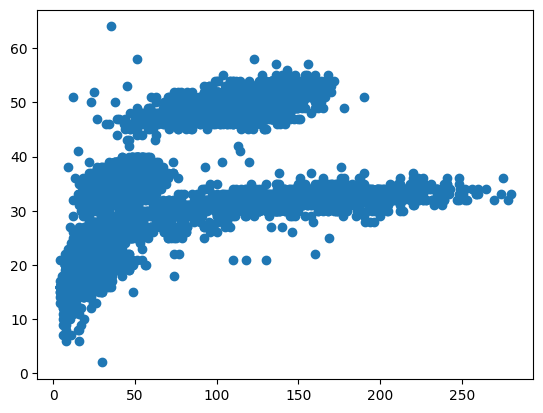

In [16]:
plt.scatter(x = surveys_df.weight, y=surveys_df.hindfoot_length)

plt.show()

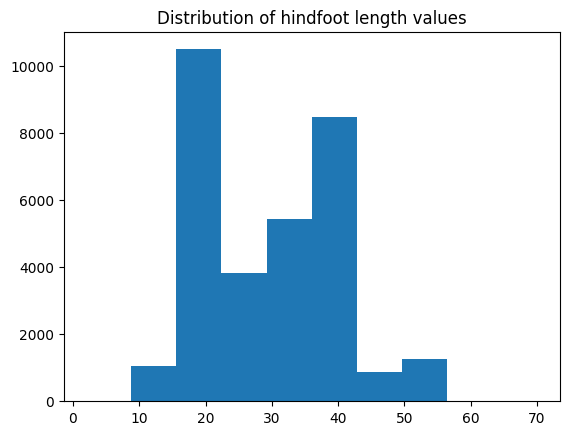

In [17]:
plt.hist(surveys_df.hindfoot_length[surveys_df.hindfoot_length.notnull()])
plt.title('Distribution of hindfoot length values')
plt.show()

We can also call `.plot()` on a Series:

<Axes: xlabel='species_id'>

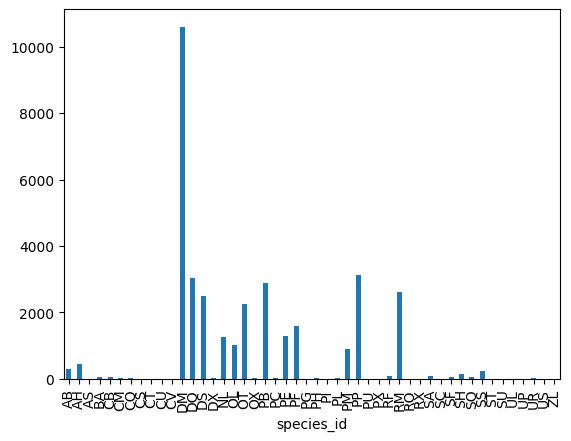

In [18]:
species_counts.plot(kind='bar')

<Axes: xlabel='species_id'>

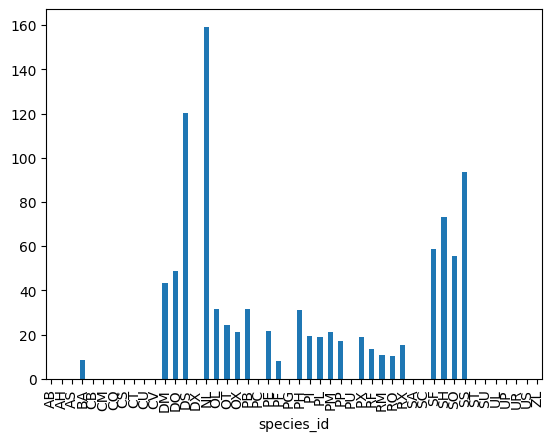

In [19]:
species_mean_weights.plot(kind='bar')

And now for a scatter plot, where we specify which variables are the x and y:

<Axes: xlabel='weight', ylabel='hindfoot_length'>

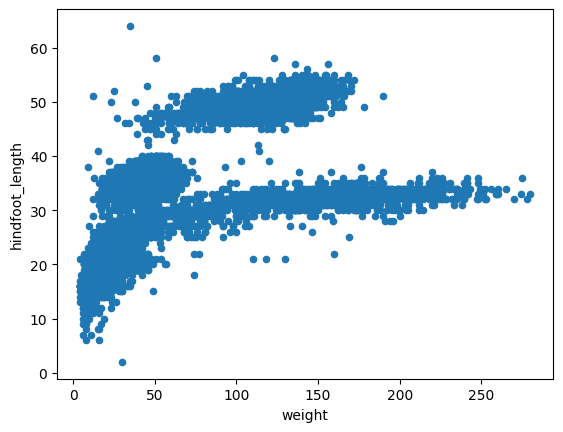

In [20]:
surveys_df.plot(kind='scatter', y='hindfoot_length', x='weight')

See if you can look up another plot type and get it to work!

In [21]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


## Nicer plotting, with `ggplot`

Let's try a different plotting library, called `ggplot` (from the `plotnine` package), that thinks about plotting data in a different way, in terms of "adding" *data* plus *aesthetics* (colors, shapes, etc.) plus *layers* (which add to or modify the plot)

First we need to import the ggplot library, from the `plotline` package:

In [22]:
# This step seemes to be needed to run in Google Colaboratory -- it might not be needed in Anaconda
# Install the plotnine Python library
#!pip install plotnine==0.5.0

In [23]:
from plotnine import *

The first thing we'll do is create a ggplot object and give it:
- Our data frame (`surveys_df`)
- Aesthetics information, such as which variables in our data frame will be used as the independent (x) and dependent (y) variables

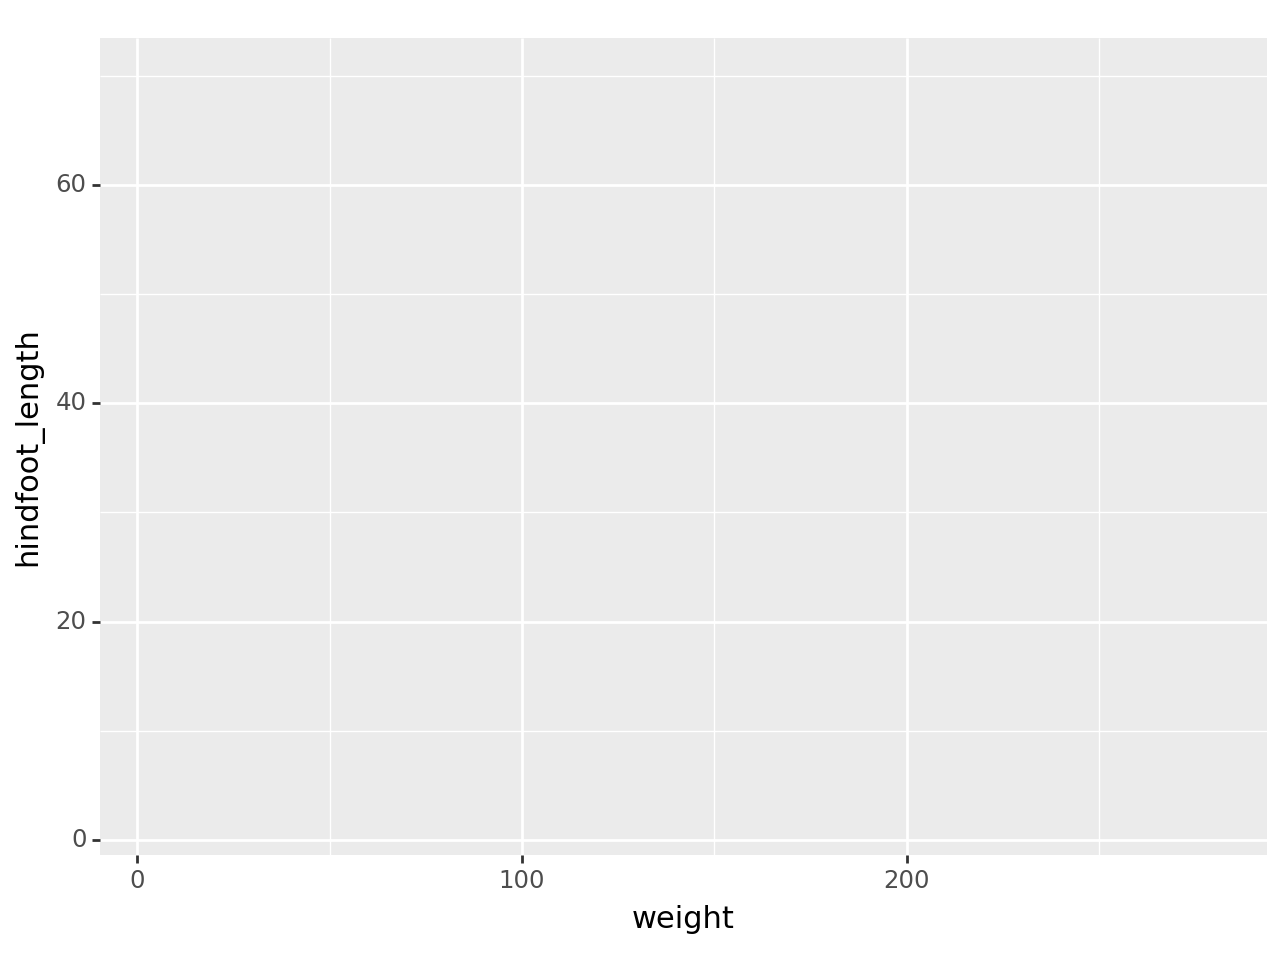

<Figure Size: (640 x 480)>

In [24]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length')

Hmmm, we get a canvas but it's mysteriously empty!   We need to add a ***layer***, using `+`.  We'll add a layer with points:

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4811 rows containing missing values.


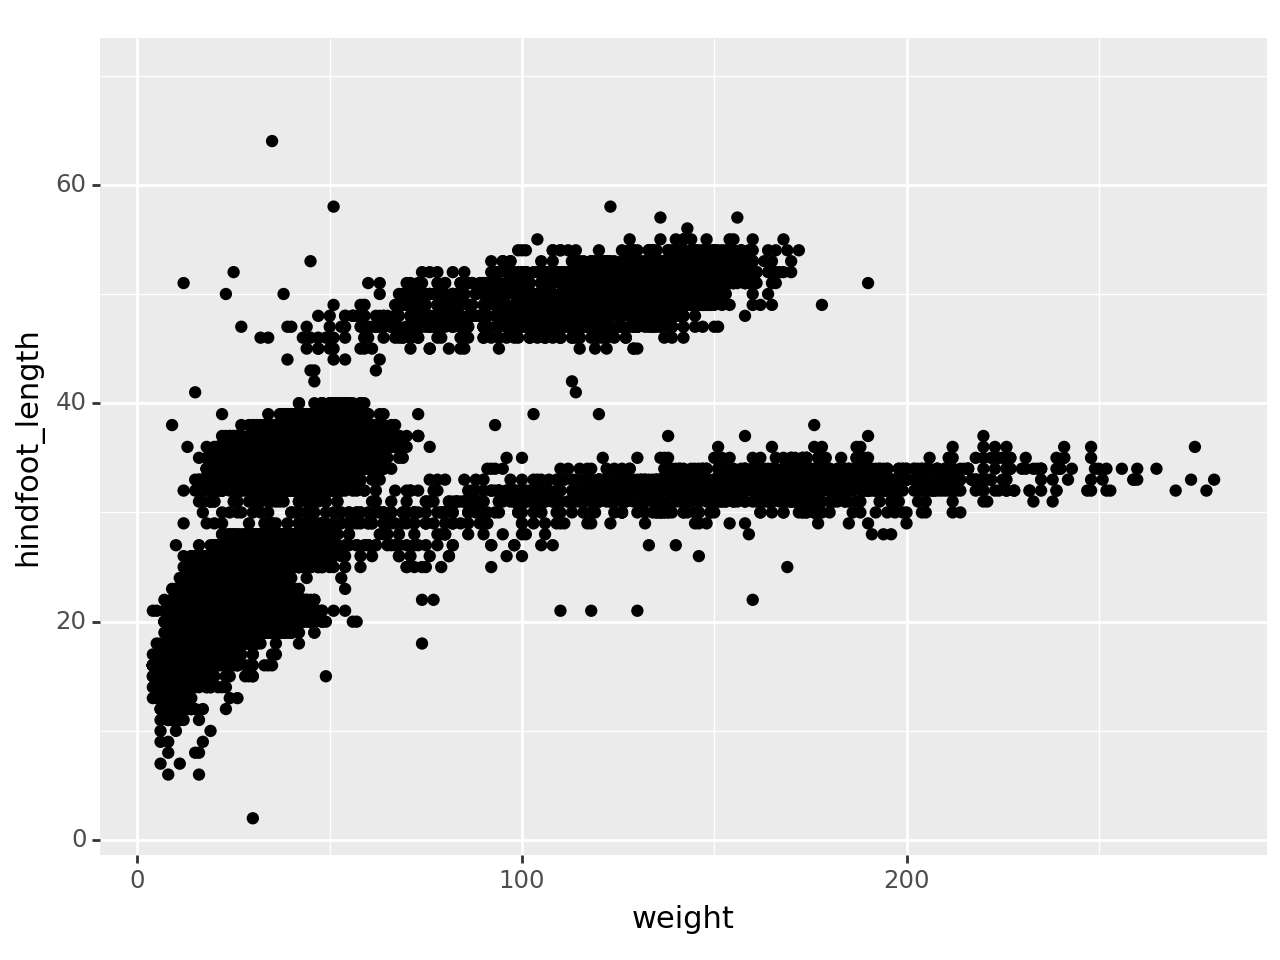

<Figure Size: (640 x 480)>

In [25]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length') + geom_point()

Not bad!  Let's see if we can perhaps color-code the points based on the species_id.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4811 rows containing missing values.


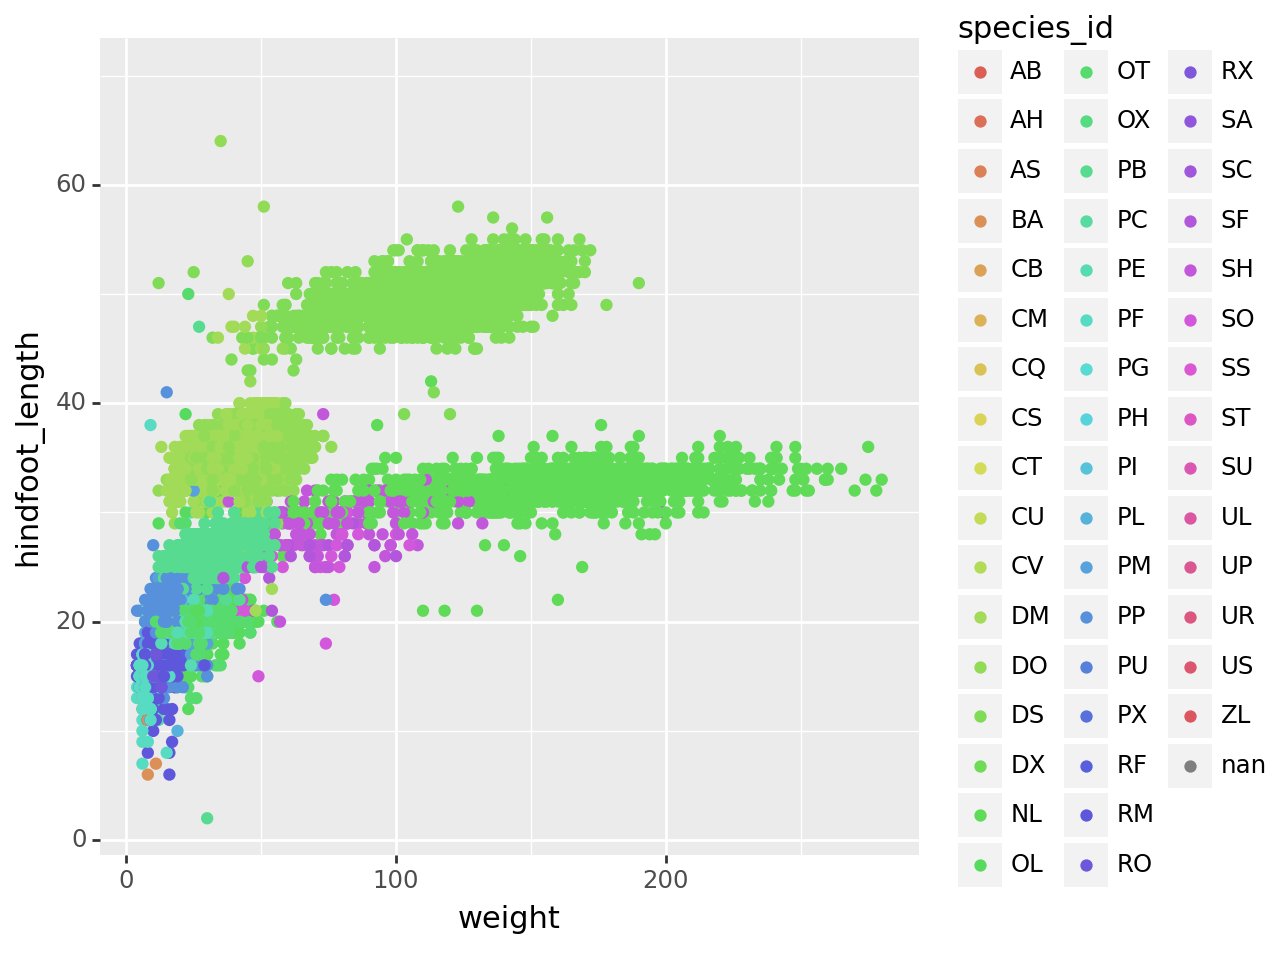

<Figure Size: (640 x 480)>

In [26]:
ggplot(surveys_df) + aes(x = 'weight', y = 'hindfoot_length', color='species_id') + geom_point()

This is great, but, perhaps with so many species_id values, it becomes hard to distinguish between the colors to have a meaningful color layer.   Let's create a subset using just the top 10 species.

Remember earlier we created `species_counts`?  We'll use it and do a bit of sorting to get just the top ten species as as a list:

In [27]:
species_counts.sort_values(ascending=False)

species_id
DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
NL     1252
OL     1006
PM      899
AH      437
AB      303
SS      248
SH      147
RF       75
SA       75
CB       50
BA       46
SF       43
SO       43
DX       40
PC       39
PL       36
PH       32
CQ       16
CM       13
OX       12
UR       10
PI        9
RO        8
UP        8
PG        8
PX        6
PU        5
SU        5
US        4
UL        4
AS        2
ZL        2
RX        2
ST        1
SC        1
CT        1
CU        1
CV        1
CS        1
dtype: int64

How would you get just the first 10 values?

But we simply want the species ids, not any of the other stuff.  Similar to a Python dictionary, we can use `.keys()` to get that:

In [28]:
species_counts.sort_values(ascending=False)[:10].keys()

Index(['DM', 'PP', 'DO', 'PB', 'RM', 'DS', 'OT', 'PF', 'PE', 'NL'], dtype='object', name='species_id')

And let's use a variable to store our index of top species so we can reuse it:

In [29]:
top_species = species_counts.sort_values(ascending=False)[:10].keys()

Now that we have a simple list of the top 10 species IDs, we can use `.isin()` to create a subset data frame containing just the rows with those species_id values:

Now that our new data frame has a smaller variety of species, let's try it again with species_id as the key for the color:

In [30]:
subset_df = surveys_df[surveys_df.species_id.isin(top_species)]

In [31]:
surveys_plot = ggplot(subset_df) + aes(x = 'weight', y = 'hindfoot_length', color='species_id') + geom_point()

And now to render the plot:

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2572 rows containing missing values.


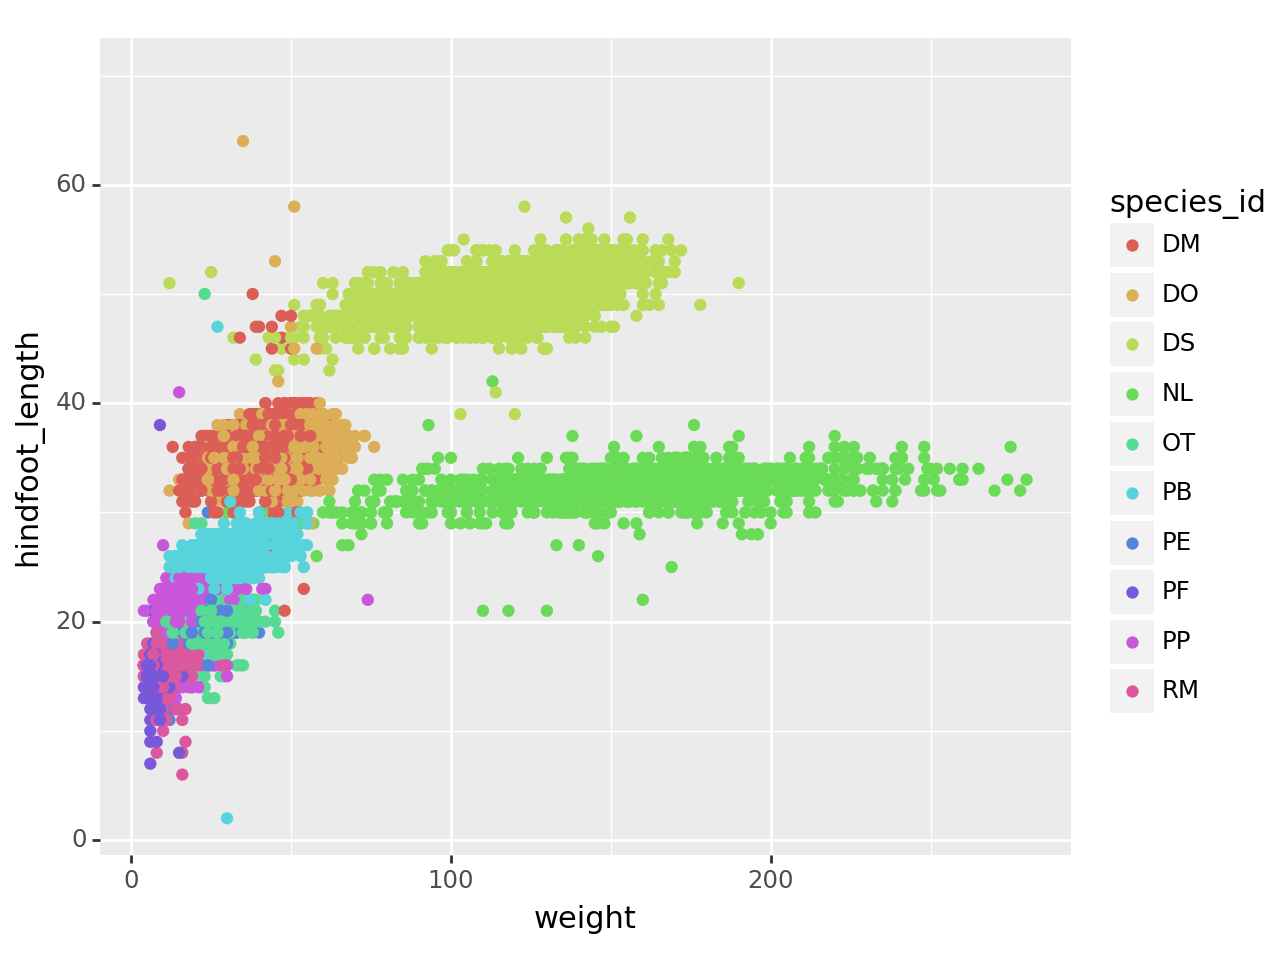

<Figure Size: (640 x 480)>

In [32]:
surveys_plot

Here are some other layers we can try adding.  See what they do:

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2572 rows containing missing values.


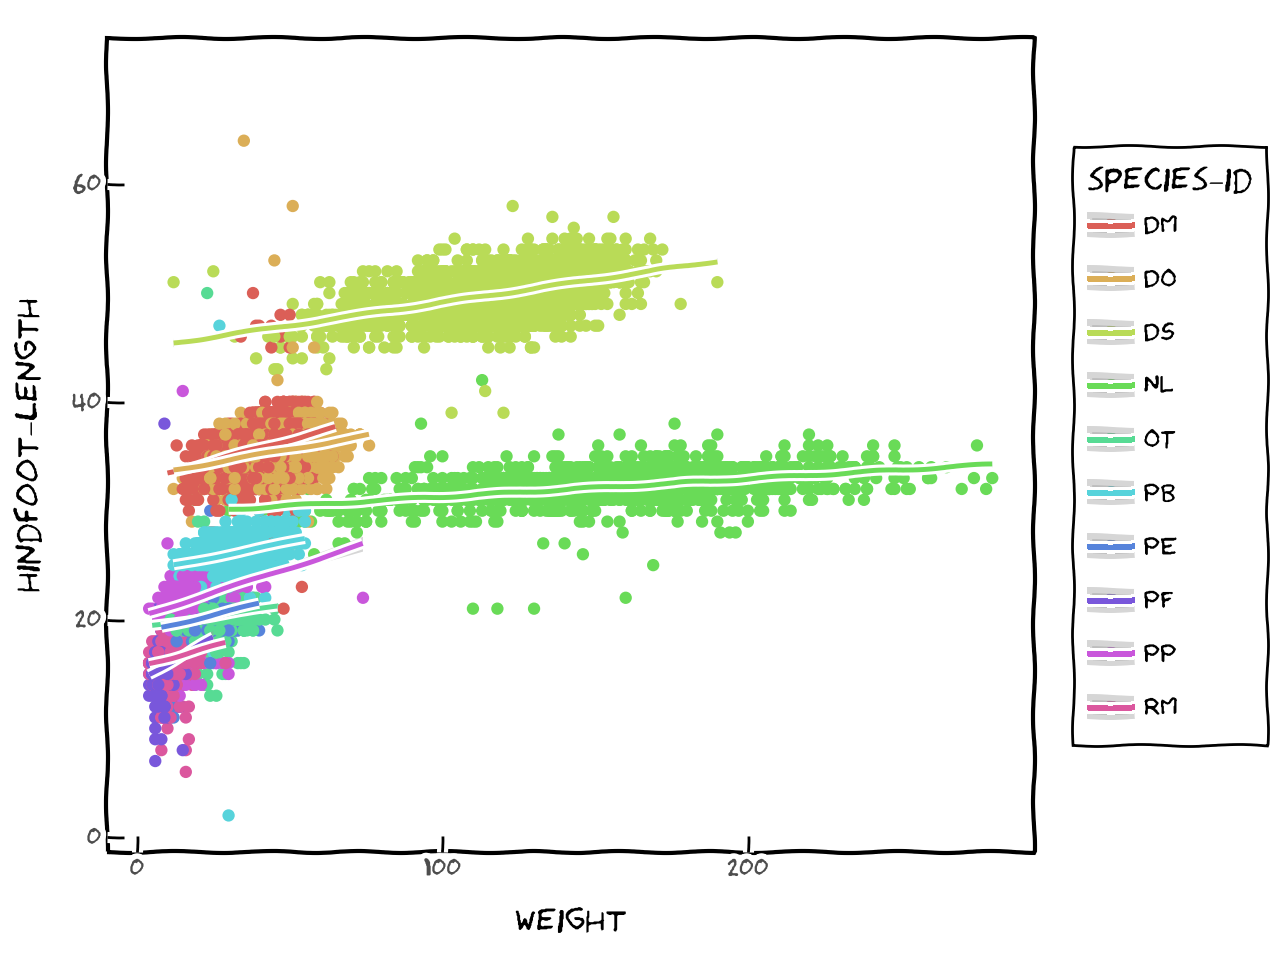

<Figure Size: (640 x 480)>

In [33]:
surveys_plot + stat_smooth() + theme_xkcd()

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2572 rows containing missing values.


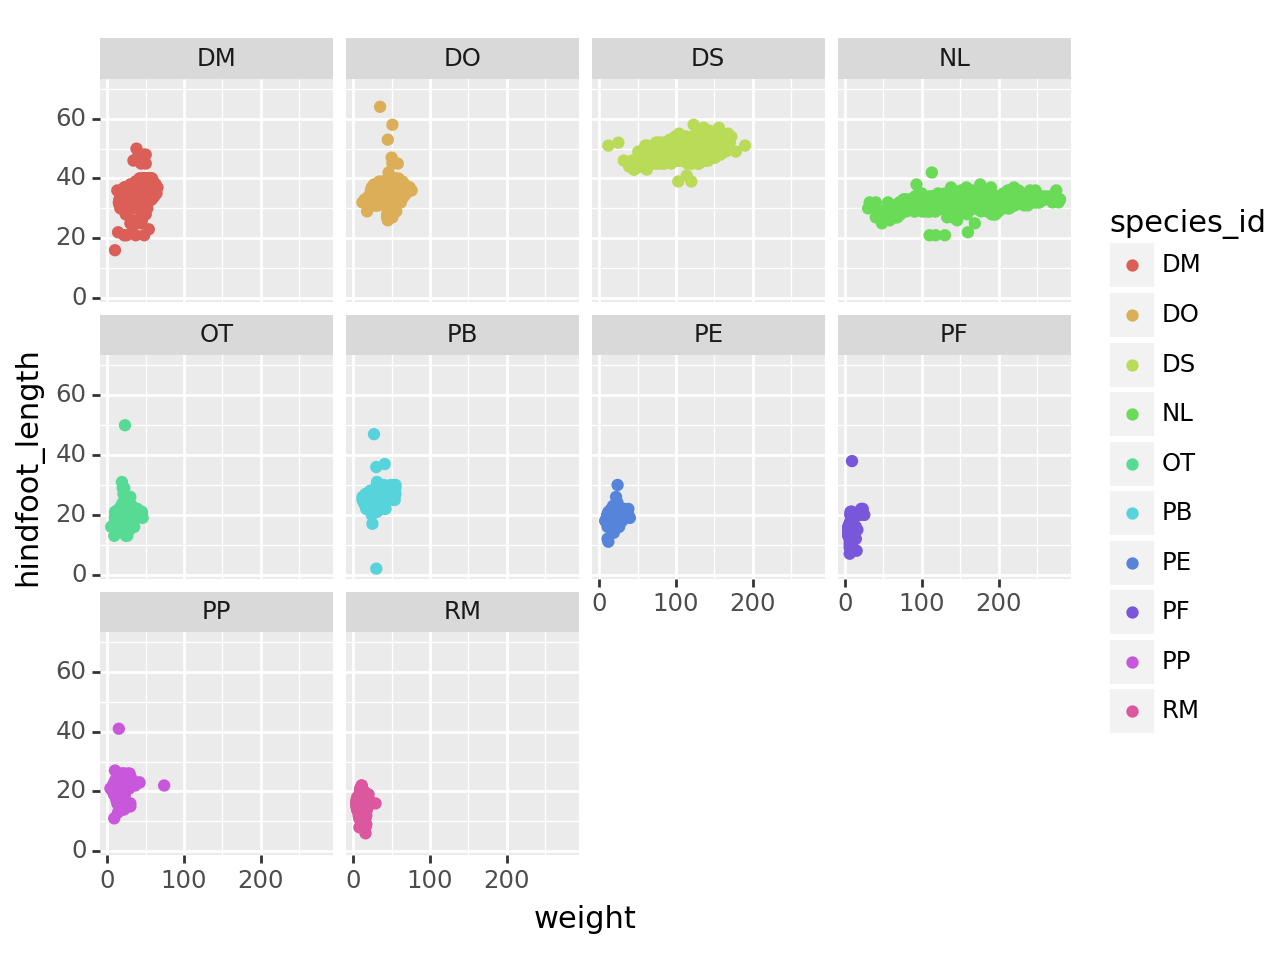

<Figure Size: (640 x 480)>

In [34]:
surveys_plot + facet_wrap('~species_id')

# Data Visualization Exercise

Another Python library for data visualization is **Seaborn**.  Like many libraries, Seaborn comes with some "built-in" sample data sets.

- Browse the Seaborn gallery at https://seaborn.pydata.org/examples/
- Choose an example that interests you.
- Copy the code to your notebook and run it.
- Look at the Data Frame that contains the data.
  - What are the variables?  What is the data type of each variable?
  - Which visual properties are mapped to which variables?
